In [ ]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Importing data from Kaggle and other sources
First dataset:Weather Observations in Aviation industry
(https://www.kaggle.com/datasets/aadharshviswanath/flight-data)
Second dataset:The global airport database for the names of airports and their location from (https://www.partow.net/miscellaneous/airportdatabase/)

In [ ]:
from scipy import stats

In [ ]:
import pandas as pd


df = pd.read_csv('flight_data.csv')
#everything else 'Flight_ID', 'Date', 'Time', 'Departure_Airport', 'Arrival_Airport','Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level','Visibility_km'

#longitut,lattitude and Abbr
airport_data = []
with open("GlobalAirportDatabase.txt", "r") as file:
    for line in file:
        data = line.strip().split(":")
        airport_data.append(data)

# column names
columns = ["ICAO_Code", "Abbr", "Airport_Name", "City", "Country", "Latitude_Degrees", "Latitude_Minutes", "Latitude_Seconds", "Latitude_Direction",
           "Longitude_Degrees", "Longitude_Minutes", "Longitude_Seconds", "Longitude_Direction", "Altitude", "Latitude_Decimal", "Longitude_Decimal"]
location_df = pd.DataFrame(airport_data, columns=columns)

print(location_df)


     ICAO_Code Abbr Airport_Name         City           Country  \
0         AYGA  GKA       GOROKA       GOROKA  PAPUA NEW GUINEA   
1         AYLA  LAE          N/A          LAE  PAPUA NEW GUINEA   
2         AYMD  MAG       MADANG       MADANG  PAPUA NEW GUINEA   
3         AYMH  HGU  MOUNT HAGEN  MOUNT HAGEN  PAPUA NEW GUINEA   
4         AYNZ  LAE       NADZAB       NADZAB  PAPUA NEW GUINEA   
...        ...  ...          ...          ...               ...   
9295      ZYTK  N/A          N/A     SHENYANG             CHINA   
9296      ZYTL  DLC   ZHOUSHUIZI       DALIAN             CHINA   
9297      ZYXC  N/A          N/A    XIANCHENG             CHINA   
9298      ZYYC  N/A          N/A       YICHUN             CHINA   
9299      ZYYJ  N/A        YANJI        YANJI             CHINA   

     Latitude_Degrees Latitude_Minutes Latitude_Seconds Latitude_Direction  \
0                 006              004              054                  S   
1                 000              000 

df

# Basic Data Cleaning
- checking for null values
- changing data formats and combining data when needed
-  Adjusting strings for database joining

In [ ]:
# Check for null or empty values in each column
null_columns = df.columns[df.isnull().any()]
empty_columns = df.columns[(df == '').any()]

if len(null_columns) > 0:
    print("Columns with null values:")
    print(null_columns)
else:
  print("No null vals")

if len(empty_columns) > 0:
    print("Columns with empty values:")
    print(empty_columns)
else:
  print("No empty vals")


No null vals
No empty vals


In [ ]:
print(df.columns)

Index(['Flight_ID', 'Date', 'Time', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km'],
      dtype='object')


# Adjusting string format of the airport column

In [ ]:
#Taking away Airport from depart/arrival to match long.lat data set abbr
df['Departure_Airport'] = df['Departure_Airport'].str.replace(' Airport', '')
df['Arrival_Airport'] = df['Arrival_Airport'].str.replace(' Airport', '')
df.head(2)

,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
0,142,2024-10-11,10:25,ATL,SEA,35,45,High,19
1,110,2024-01-20,18:38,IAH,AUS,3,25,Low,6


# Changing the data and time to be in that format

In [ ]:
def datetimeconversion(column,df):
    df[column] = pd.to_datetime(df[column])
def timeconversion(column,df):
    df['Hour'] = df[column].dt.hour
    df[column] = df[column].dt.time
    return df

In [ ]:
# print(df[['Date', 'Time']])
# Convert 'Date' and 'Time' column to datetime format
datetimeconversion('Date',df)
datetimeconversion('Time',df)


# Combine 'Date' and 'Time' into a single column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Time'].dt.strftime('%H:%M:%S'))
timeconversion('Time',df)


df.head(1)


/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/1635554156.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])


,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Datetime,Hour
0,142,2024-10-11,10:25:00,ATL,SEA,35,45,High,19,2024-10-11 10:25:00,10


## Adding Days of the week

In [ ]:

#  day of the week from a datetime column
def weekdayconversion(df,column):
    day_to_num = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7}  # num day of week

    df['Weekday'] = df[column].dt.day_name()
    df['Weekday_numeric'] = df['Weekday'].map(day_to_num)

    df.drop('Weekday',axis=1, inplace=True)

weekdayconversion(df,'Datetime')
df.head(1)

,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Datetime,Hour,Weekday_numeric
0,142,2024-10-11,10:25:00,ATL,SEA,35,45,High,19,2024-10-11 10:25:00,10,5


In [ ]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

df['TimeOfDay'] = df['Hour'].apply(time_of_day)
time_map = {
    "Morning": 1,
    "Afternoon": 2,
    "Evening": 3,
    "Night": 4
}
df['TimeOfDay_num'] = df['TimeOfDay'].map(time_map)

# Converting data to the metric system

In [ ]:
#cunverting knots to m/h
#nmile = nautical mile
def mphconversion(column,df):
    nmile = 1.15078
    df[column + 'tomph'] = df[column] * nmile
    df.drop(column, axis=1, inplace=True)

mphconversion('Wind_Speed_knots',df)

df.head(1)

,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Turbulence_Level,Visibility_km,Datetime,Hour,Weekday_numeric,Wind_Speed_knotstomph
0,142,2024-10-11,10:25:00,ATL,SEA,35,High,19,2024-10-11 10:25:00,10,5,51.7851


In [ ]:
# Conversion from kilometers to feet fro visability
# Convert 'Visibility_km' column to numeric
df['Visibility_km'] = pd.to_numeric(df['Visibility_km'], errors='coerce')
non_numeric_values = df['Visibility_km'].loc[df['Visibility_km'].apply(lambda x: not isinstance(x, (int, float)))]

print("Non-numeric values in 'Visibility_km' column:")
print(non_numeric_values)

def mileconversion(df,column):
    conversion_factor = 1.609
    df[column +'_tomile'] = df[column] / conversion_factor
    df.drop(column,axis=1, inplace=True)

mileconversion(df, 'Visibility_km')

# Convert temperature from Celsius to Fahrenheit
def tempconversion(df, column):
    df[column + '_toFahrenheit'] = (df[column] * 9/5) + 32
    df.drop(column,axis=1, inplace= True)

tempconversion(df, 'Temperature_Celsius')


Non-numeric values in 'Visibility_km' column:
Series([], Name: Visibility_km, dtype: float64)


# Creation of seasons column

In [ ]:
#Turning Months to season

def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

df['Season'] = df['Date'].dt.month.apply(month_to_season)

# Print the DataFrame to verify the changes
print(df[['Date', 'Season']])


           Date  Season
0    2024-10-11       3
1    2024-01-20       0
2    2024-12-26       0
3    2024-08-19       2
4    2024-12-07       0
...         ...     ...
9995 2024-10-17       3
9996 2024-11-16       3
9997 2024-07-23       2
9998 2024-05-19       1
9999 2024-10-26       3

[10000 rows x 2 columns]


# Mapping turbulance levels

In [ ]:
# Mapping turbulence levels to numbers
def turbulancemap(df,column):
    turbulence_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
    df[column +'toNumerical'] = df[column].map(turbulence_mapping)
    df.drop(column,axis=1,inplace = True)

turbulancemap(df,'Turbulence_Level')
print(df.head(1))


   Flight_ID       Date      Time Departure_Airport Arrival_Airport  \
0        142 2024-10-11  10:25:00               ATL             SEA   

             Datetime  Hour  Weekday_numeric  Wind_Speed_knotstomph  \
0 2024-10-11 10:25:00    10                5                51.7851   

   Visibility_km_tomile  Temperature_Celsius_toFahrenheit  Season  \
0             11.808577                              95.0       3   

   Turbulence_LeveltoNumerical  
0                            3  


# outlier detection

In [ ]:
# Outlier Detection
#  Z-score method > 3


def detect_outliers_zscore(df, threshold=3):
    outliers = []
    for column in df.select_dtypes(include='number').columns:
        z_scores = stats.zscore(df[column])
        outliers.extend(df.index[z_scores > threshold])
    return list(set(outliers))

outliers = detect_outliers_zscore(df)
print("\nOutliers Detected:")
print(outliers)






Outliers Detected:
[]


# Summary statitics

In [ ]:
# Summary statistics for numeric columns
# Jupyter-friendly display
df.describe().T.style.format("{:.2f}").set_caption("Summary Statistics for Numerical Columns")

,count,mean,min,25%,50%,75%,max,std
Flight_ID,10000.00,100.69,1.00,50.00,102.00,150.00,200.00,57.39
Date,10000.00,.2f,.2f,.2f,.2f,.2f,.2f,nan
Datetime,10000.00,.2f,.2f,.2f,.2f,.2f,.2f,nan
Hour,10000.00,11.47,0.00,6.00,11.00,17.00,23.00,6.89
Weekday_numeric,10000.00,4.02,1.00,2.00,4.00,6.00,7.00,1.99
Wind_Speed_knotstomph,10000.00,28.66,0.00,13.81,28.77,43.73,57.54,17.05
Visibility_km_tomile,9999.00,6.53,0.62,3.73,6.84,9.32,12.43,3.58
Temperature_Celsius_toFahrenheit,10000.00,50.57,-4.00,23.00,51.80,77.00,104.00,31.67
Season,10000.00,1.50,0.00,0.00,1.00,3.00,3.00,1.12
Turbulence_LeveltoNumerical,10000.00,2.01,1.00,1.00,2.00,3.00,3.00,0.82


# mapping Global Airport database names and locations

In [ ]:
def parse_column_to_dict(df, column_name, location_df):
    value_dict = {}
    unique_values = df[column_name].unique()
    for index, value in enumerate(unique_values):
        if value in location_df['Abbr'].values:
            latitude = location_df.loc[location_df['Abbr'] == value, 'Latitude_Decimal'].iloc[0]
            longitude = location_df.loc[location_df['Abbr'] == value, 'Longitude_Decimal'].iloc[0]
            value_dict[value] = {'Index': index, 'Latitude': latitude, 'Longitude': longitude}
        else:
            print(f"Abbreviation '{value}' not found in location data.")
    return value_dict

#Dicts
depart_dict = parse_column_to_dict(df, 'Departure_Airport', location_df)
arrive_dict = parse_column_to_dict(df, 'Arrival_Airport', location_df)

#print(depart_dict)
#print(arrive_dict)


In [ ]:
# Function to add new columns based on departure and arrival dictionaries
def add_dict_columns(df, depart_dict, arrive_dict):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Get the departure and arrival airport abbreviations from the DataFrame
        depart_abbr = row['Departure_Airport']
        arrive_abbr = row['Arrival_Airport']

        # Add departure columns
        depart_index = depart_dict[depart_abbr]['Index']
        df.at[index, f'Depart_Latitude'] = depart_dict[depart_abbr]['Latitude']
        df.at[index, f'Depart_Longitude'] = depart_dict[depart_abbr]['Longitude']
        df.at[index, f'Depart_Index'] = depart_index

        # Add arrival columns
        arrive_index = arrive_dict[arrive_abbr]['Index']
        df.at[index, f'Arrive_Latitude'] = arrive_dict[arrive_abbr]['Latitude']
        df.at[index, f'Arrive_Longitude'] = arrive_dict[arrive_abbr]['Longitude']
        df.at[index, f'Arrive_Index'] = arrive_index

    return df

# Add new columns to the DataFrame
df = add_dict_columns(df, depart_dict, arrive_dict)

# Display the updated DataFrame
print(df.head(3))


   Flight_ID       Date      Time Departure_Airport Arrival_Airport  \
0        142 2024-10-11  10:25:00               ATL             SEA   
1        110 2024-01-20  18:38:00               IAH             AUS   
2        113 2024-12-26  12:50:00               STL             SEA   

             Datetime  Hour  Weekday_numeric  Wind_Speed_knotstomph  \
0 2024-10-11 10:25:00    10                5               51.78510   
1 2024-01-20 18:38:00    18                6               28.76950   
2 2024-12-26 12:50:00    12                4               55.23744   

   Visibility_km_tomile  Temperature_Celsius_toFahrenheit  Season  \
0             11.808577                              95.0       3   
1              3.729024                              37.4       0   
2              3.729024                              68.0       0   

   Turbulence_LeveltoNumerical Depart_Latitude Depart_Longitude  Depart_Index  \
0                            3          33.640          -84.427         

In [ ]:
import pandas as pd
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth (specified in decimal degrees).
    Returns miles.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in miles
    r = 3958.8
    return c * r

def calculate_distance(row):
    return haversine_distance(
        float(row['Depart_Latitude']),
        float(row['Depart_Longitude']),
        float(row['Arrive_Latitude']),
        float(row['Arrive_Longitude'])
    )

# Apply to your DataFrame
df['Distance_mile'] = df.apply(calculate_distance, axis=1)

print(df.head(1))

   Flight_ID       Date      Time Departure_Airport Arrival_Airport  \
0        142 2024-10-11  10:25:00               ATL             SEA   

             Datetime  Hour  Weekday_numeric  Wind_Speed_knotstomph  \
0 2024-10-11 10:25:00    10                5                51.7851   

   Visibility_km_tomile  Temperature_Celsius_toFahrenheit  Season  \
0             11.808577                              95.0       3   

   Turbulence_LeveltoNumerical Depart_Latitude Depart_Longitude  Depart_Index  \
0                            3          33.640          -84.427           0.0   

  Arrive_Latitude Arrive_Longitude  Arrive_Index  Distance_mile  
0          47.449         -122.309           0.0    2177.827896  


## Correlation

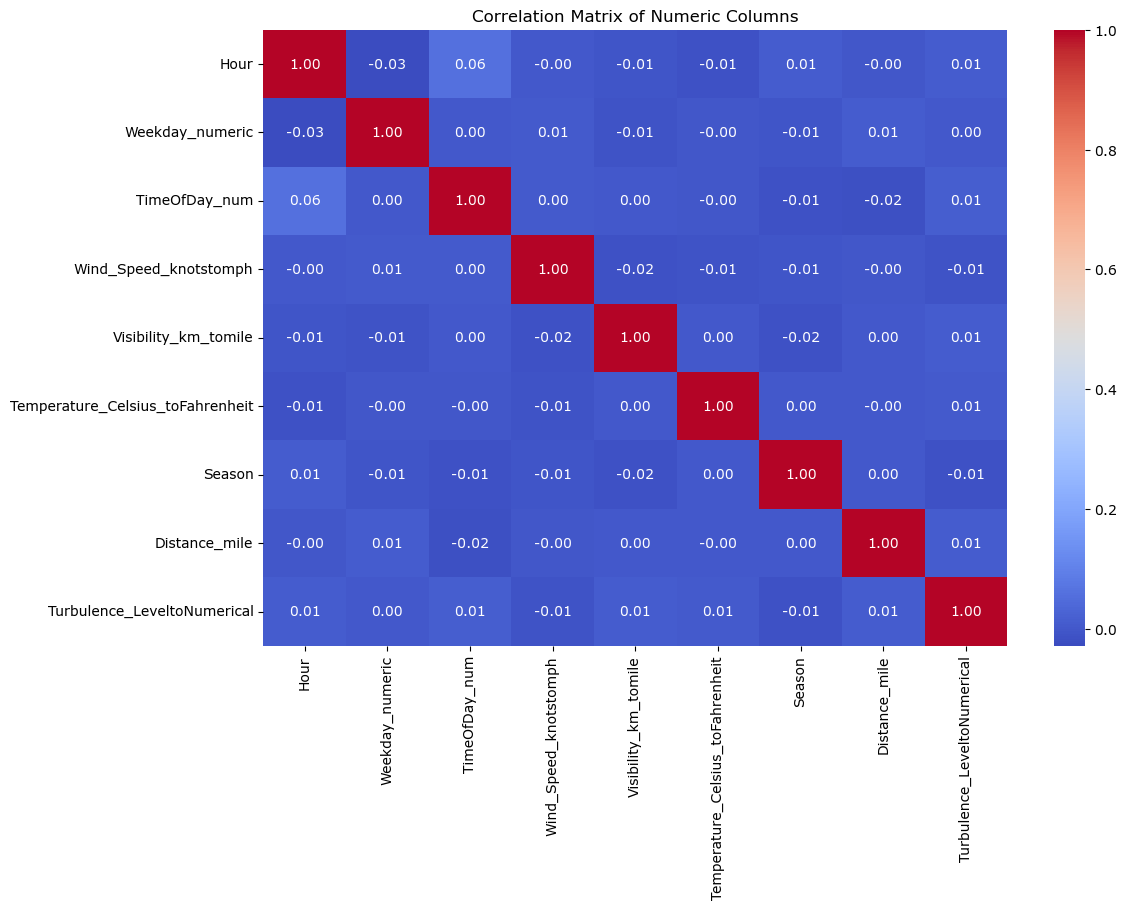

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_cols = ['Hour', 'Weekday_numeric', 'TimeOfDay_num','Wind_Speed_knotstomph',
                'Visibility_km_tomile', 'Temperature_Celsius_toFahrenheit',
                'Season', 'Distance_mile',
                'Turbulence_LeveltoNumerical']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Vizualizations

### Distrbution of flight dist.

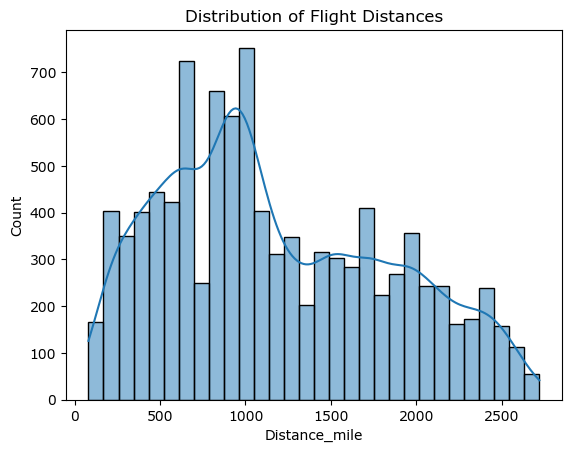

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distance histogram
sns.histplot(df['Distance_mile'], bins=30, kde=True)
plt.title('Distribution of Flight Distances')
plt.show()

### Dist. plot of Flights by week and hour

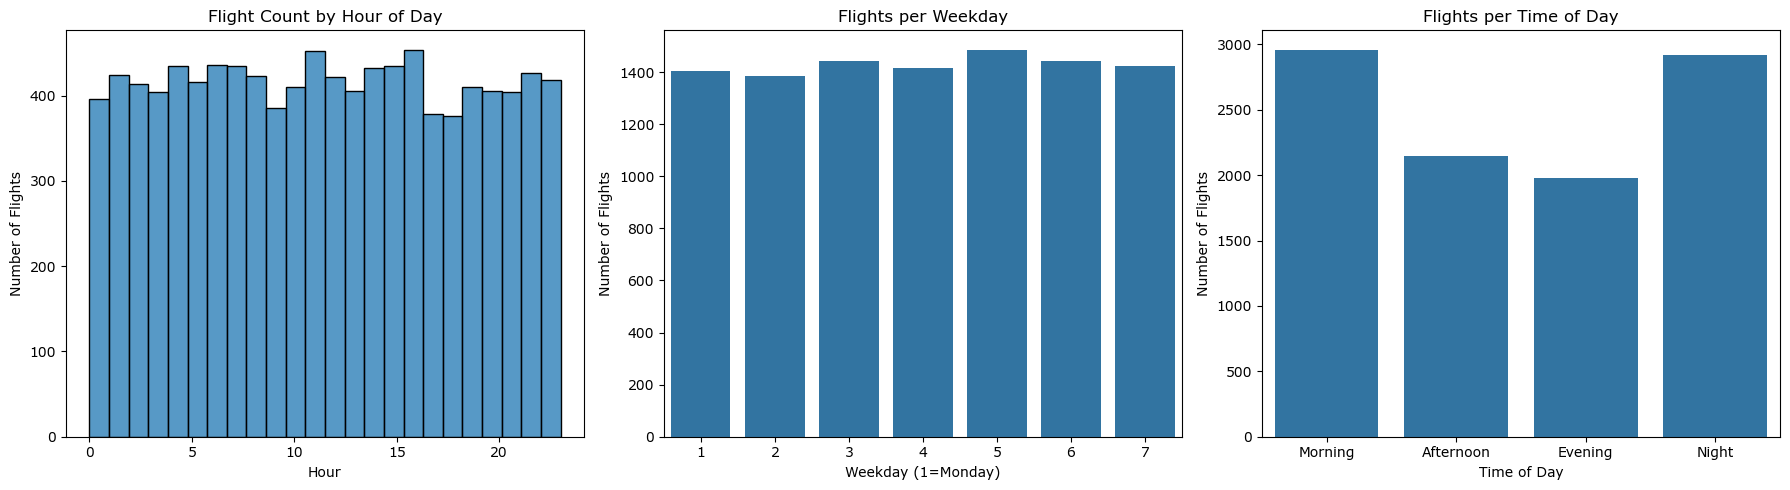

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram: Flights per Hour
sns.histplot(df['Hour'], bins=24, kde=False, ax=axes[0])
axes[0].set_title('Flight Count by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Flights')

# Countplot: Flights per Weekday
sns.countplot(x='Weekday_numeric', data=df, ax=axes[1])
axes[1].set_title('Flights per Weekday')
axes[1].set_xlabel('Weekday (1=Monday)')
axes[1].set_ylabel('Number of Flights')


# Countplot: Flights per Time of Day
sns.countplot(x='TimeOfDay', data=df, order=["Morning", "Afternoon", "Evening", "Night"], ax=axes[2])
axes[2].set_title('Flights per Time of Day')
axes[2].set_xlabel('Time of Day')
axes[2].set_ylabel('Number of Flights')

plt.tight_layout()  # adjust spacing so titles/labels don't overlap
plt.show()


### Distance scatter plot vs spped and turbulence

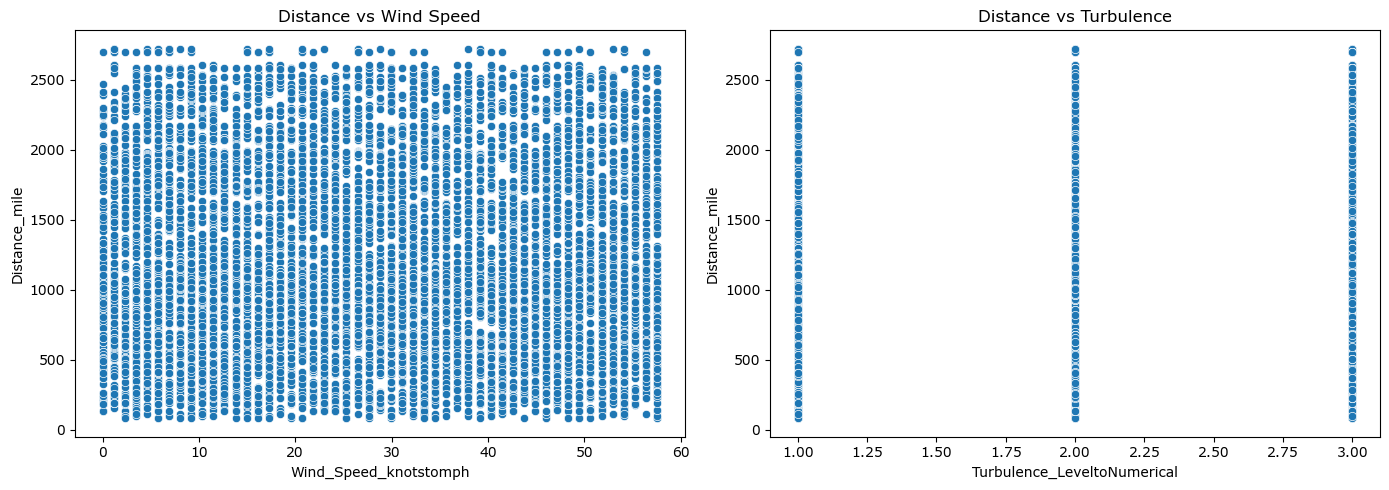

In [ ]:
#Relationship btwn distnace and windspeed

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # width=14, height=5

# First plot: Distance vs Wind Speed
sns.scatterplot(x='Wind_Speed_knotstomph', y='Distance_mile', data=df, ax=axes[0])
axes[0].set_title('Distance vs Wind Speed')

# Second plot: Distance vs Turbulence
sns.scatterplot(x='Turbulence_LeveltoNumerical', y='Distance_mile', data=df, ax=axes[1])
axes[1].set_title('Distance vs Turbulence')

plt.tight_layout()  # adjusts spacing so titles/labels don't overlap
plt.show()

### Boxplot of turbulence vs windspeed and distance

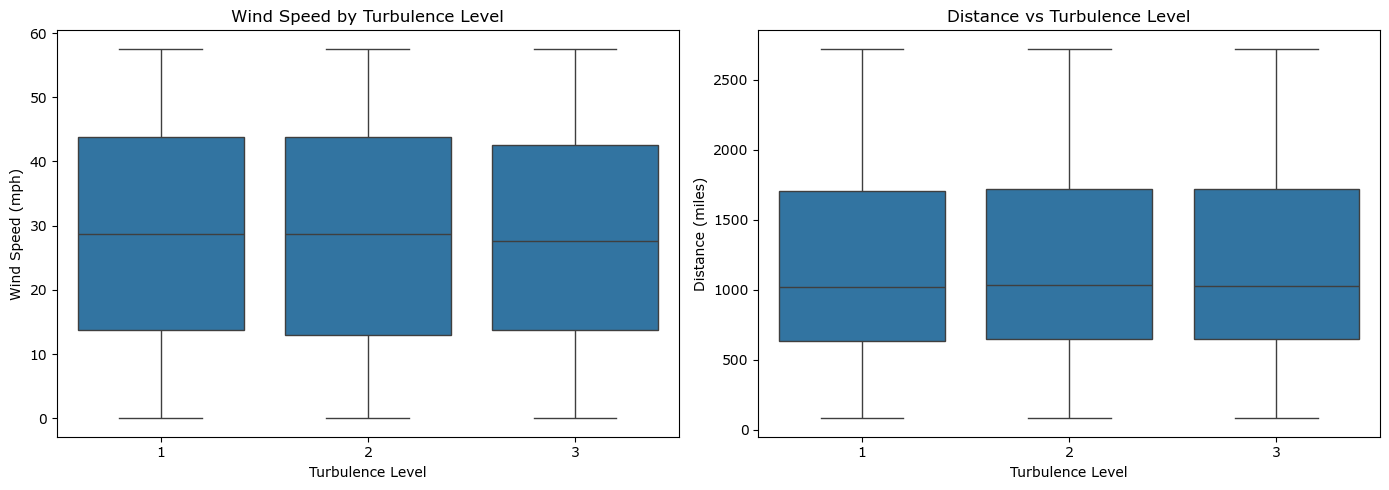

In [ ]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # adjust width/height as needed

# Boxplot 1: Wind Speed vs Turbulence
sns.boxplot(x='Turbulence_LeveltoNumerical', y='Wind_Speed_knotstomph', data=df, ax=axes[0])
axes[0].set_title('Wind Speed by Turbulence Level')
axes[0].set_xlabel('Turbulence Level')
axes[0].set_ylabel('Wind Speed (mph)')

# Boxplot 2: Distance vs Turbulence
sns.boxplot(x='Turbulence_LeveltoNumerical', y='Distance_mile', data=df, ax=axes[1])
axes[1].set_title('Distance vs Turbulence Level')
axes[1].set_xlabel('Turbulence Level')
axes[1].set_ylabel('Distance (miles)')

plt.tight_layout()  # prevents overlap of titles/labels
plt.show()

### Top 10 departure and arrival airports

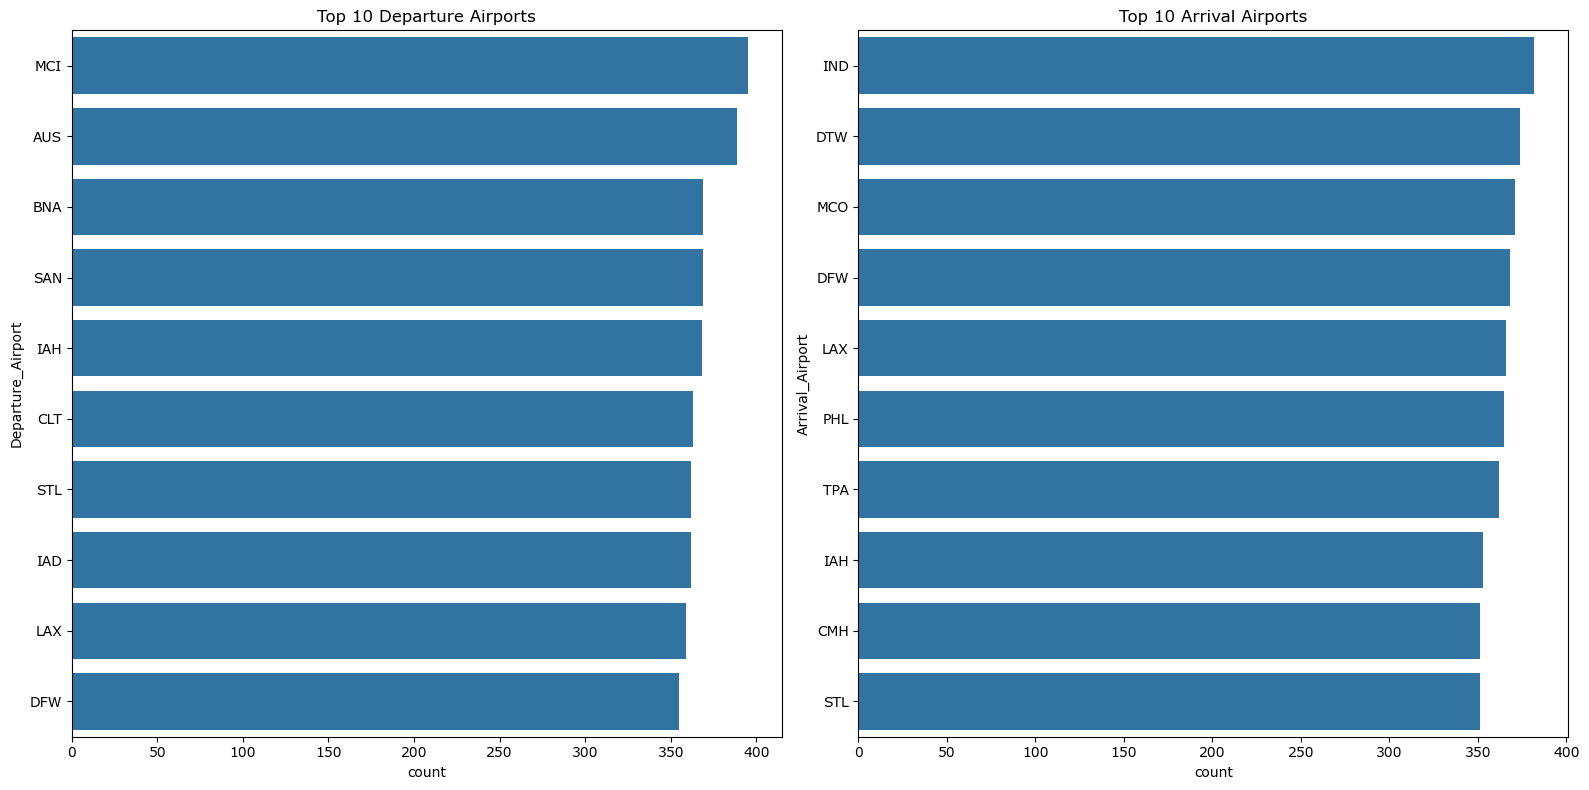

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # width=16 for long airport names

# Top 10 Departure Airports
sns.countplot(
    y='Departure_Airport',
    data=df,
    order=df['Departure_Airport'].value_counts().index[:10],
    ax=axes[0]
)
axes[0].set_title('Top 10 Departure Airports')

# Top 10 Arrival Airports
sns.countplot(
    y='Arrival_Airport',
    data=df,
    order=df['Arrival_Airport'].value_counts().index[:10],
    ax=axes[1]
)
axes[1].set_title('Top 10 Arrival Airports')

plt.tight_layout()  # adjust spacing so labels/titles don't overlap
plt.show()

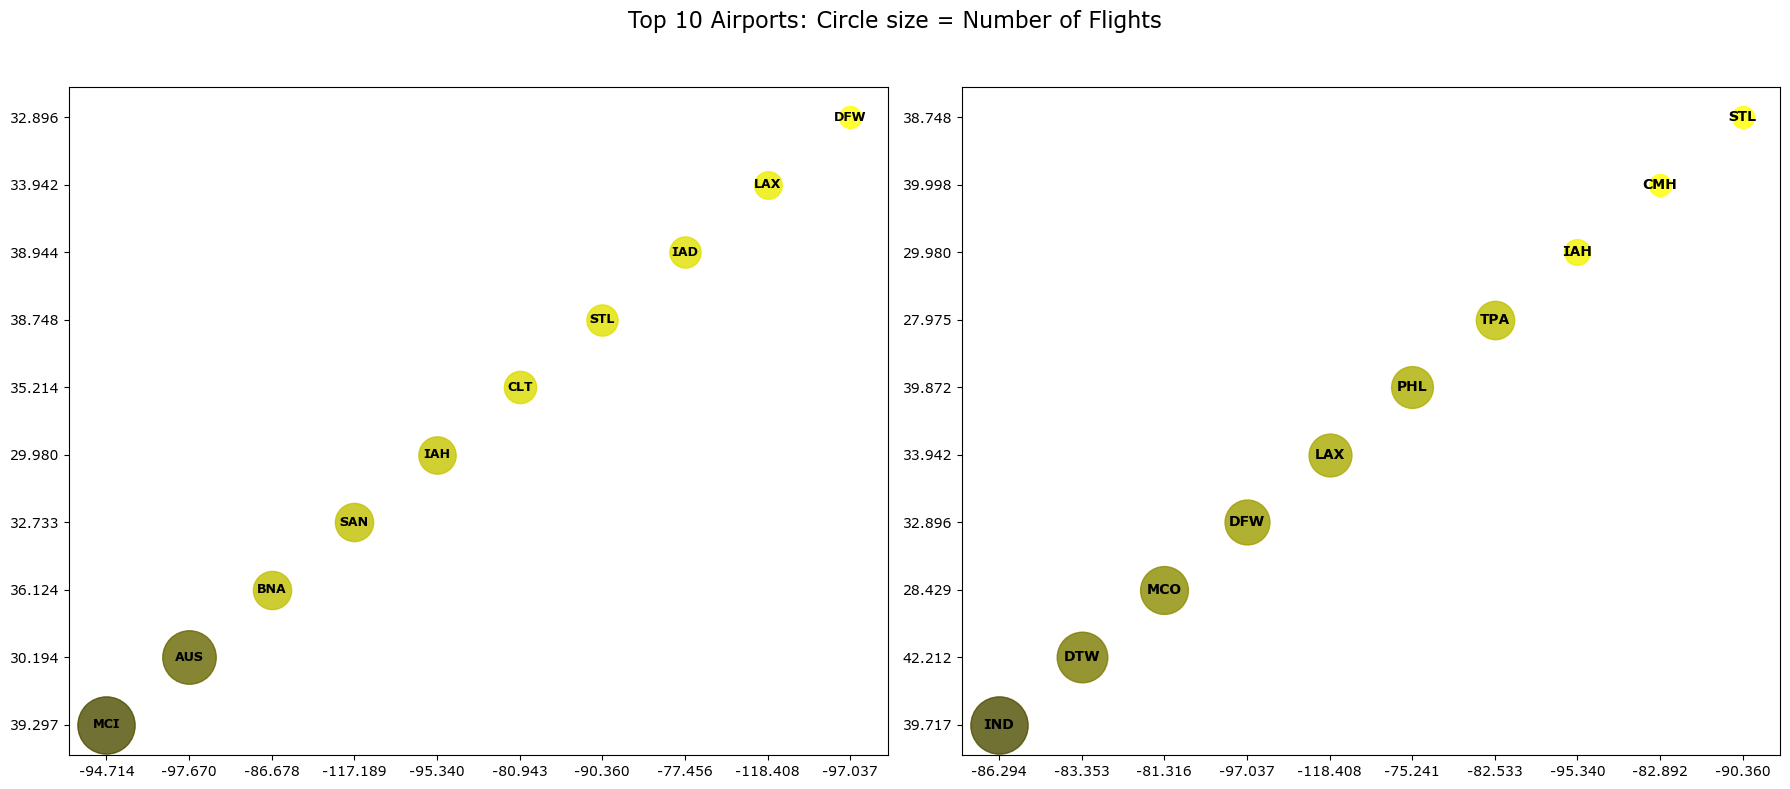

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 departure and arrival airports
top_departures = df['Departure_Airport'].value_counts().head(10)
top_arrivals = df['Arrival_Airport'].value_counts().head(10)

# Merge lat/lon info for each airport
dep_coords = df[['Departure_Airport','Depart_Latitude','Depart_Longitude']].drop_duplicates().set_index('Departure_Airport')
arr_coords = df[['Arrival_Airport','Arrive_Latitude','Arrive_Longitude']].drop_duplicates().set_index('Arrival_Airport')

fig, axes = plt.subplots(1, 2, figsize=(18,8))

# Scale function for circle sizes
def scale_sizes(counts, min_size=250, max_size=1700):
    counts = np.array(counts)
    scaled = (counts - counts.min()) / (counts.max() - counts.min()) * (max_size - min_size) + min_size
    return scaled

# Reverse scale function for color intensity (small = light, big = dark)
def scale_colors_reverse(counts, min_color=0.3, max_color=1.0):
    counts = np.array(counts)
    scaled = (counts - counts.min()) / (counts.max() - counts.min())  # 0 to 1
    scaled = max_color - scaled * (max_color - min_color)  # reverse scale
    return scaled

# Left plot: departures (yellow gradient)
dep_colors = scale_colors_reverse(top_departures.values)
for (airport, count), size, intensity in zip(top_departures.items(), dep_sizes, dep_colors):
    lat, lon = dep_coords.loc[airport, ['Depart_Latitude','Depart_Longitude']]
    axes[0].scatter(lon, lat, s=size, color=(intensity, intensity, 0), alpha=0.8)
    axes[0].text(lon, lat, airport, ha='center', va='center', fontsize=9, weight='bold')

# Right plot: arrivals (yellow gradient)
arr_colors = scale_colors_reverse(top_arrivals.values)
for (airport, count), size, intensity in zip(top_arrivals.items(), arr_sizes, arr_colors):
    lat, lon = arr_coords.loc[airport, ['Arrive_Latitude','Arrive_Longitude']]
    axes[1].scatter(lon, lat, s=size, color=(intensity, intensity, 0), alpha=0.8)
    axes[1].text(lon, lat, airport, ha='center', va='center', fontsize=10, weight='bold', color='black')

plt.suptitle("Top 10 Airports: Circle size = Number of Flights", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Grouped Averages

/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/219364162.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/219364162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/219364162.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/219364162.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

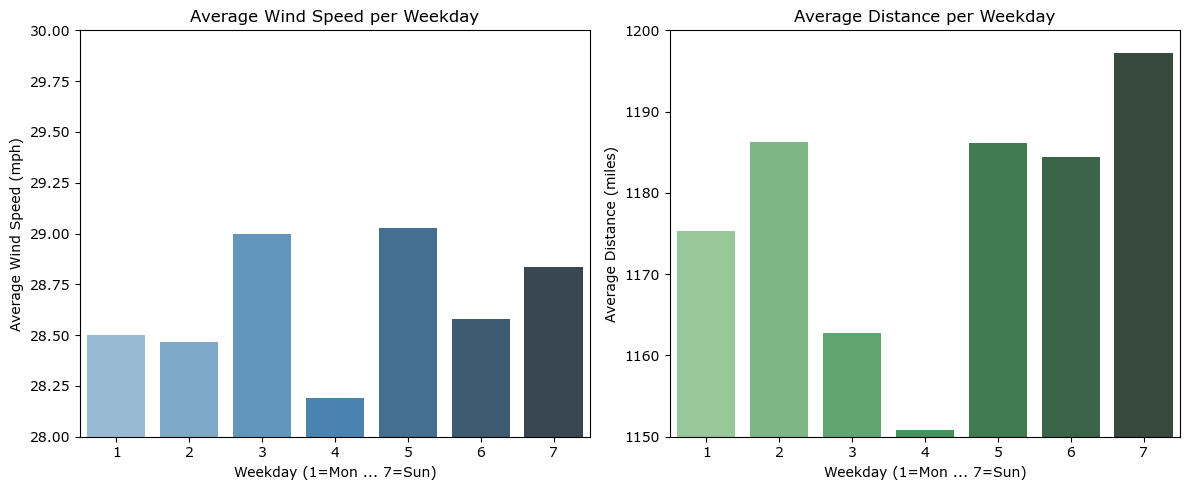

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# ----- Average wind speed per weekday -----
plt.subplot(1,2,1)
ax1 = sns.barplot(
    x='Weekday_numeric',
    y='Wind_Speed_knotstomph',
    data=df,
    estimator='mean',
    palette="Blues_d",
    ci=None  # remove confidence interval (vertical line)
)
plt.title("Average Wind Speed per Weekday")
plt.xlabel("Weekday (1=Mon ... 7=Sun)")
plt.ylabel("Average Wind Speed (mph)")
ax1.set_ylim(28, 30)


# ----- Average distance per weekday -----
plt.subplot(1,2,2)
ax2 = sns.barplot(
    x='Weekday_numeric',
    y='Distance_mile',
    data=df,
    estimator='mean',
    palette="Greens_d",
    ci=None  # remove confidence interval
)
plt.title("Average Distance per Weekday")
plt.xlabel("Weekday (1=Mon ... 7=Sun)")
plt.ylabel("Average Distance (miles)")
ax2.set_ylim(1150, 1200)


plt.tight_layout()
plt.show()

/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/2207241461.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/2207241461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/2207241461.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax4 = sns.barplot(
/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/2207241461.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

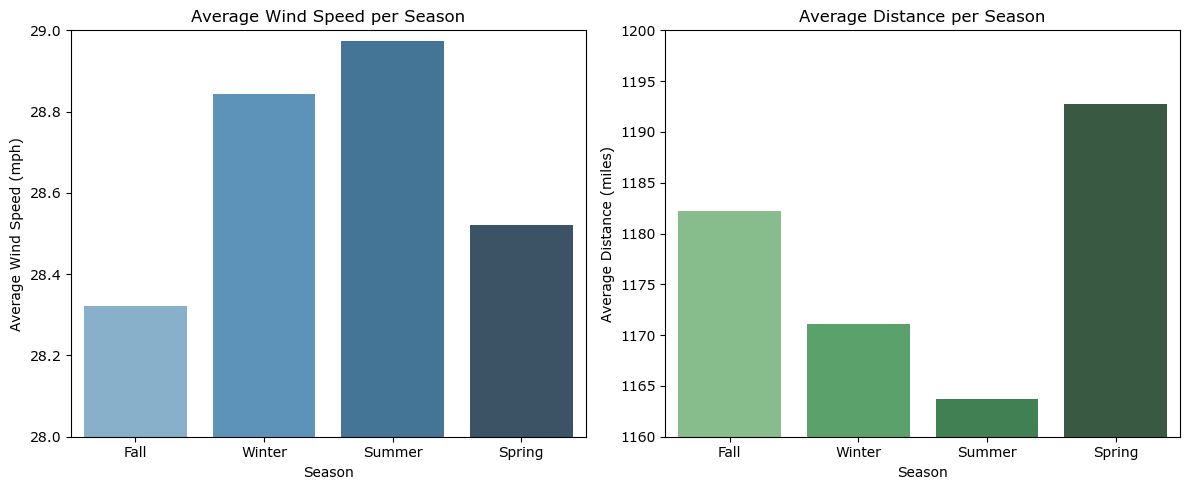

In [ ]:

# ----- Per-season plots -----
plt.figure(figsize=(12,5))

# Average wind speed per season
plt.subplot(1,2,1)
ax3 = sns.barplot(
    x=df['Season'].map(season_labels),
    y='Wind_Speed_knotstomph',
    data=df,
    estimator='mean',
    palette="Blues_d",
    ci=None
)
plt.title("Average Wind Speed per Season")
plt.xlabel("Season")
plt.ylabel("Average Wind Speed (mph)")
ax3.set_ylim(28, 29.0)  # zoom to your data range


# Average distance per season
plt.subplot(1,2,2)
ax4 = sns.barplot(
    x=df['Season'].map(season_labels),
    y='Distance_mile',
    data=df,
    estimator='mean',
    palette="Greens_d",
    ci=None
)
plt.title("Average Distance per Season")
plt.xlabel("Season")
plt.ylabel("Average Distance (miles)")
ax4.set_ylim(1160, 1200)  # zoom to your data range

plt.tight_layout()
plt.show()

### HeatMap

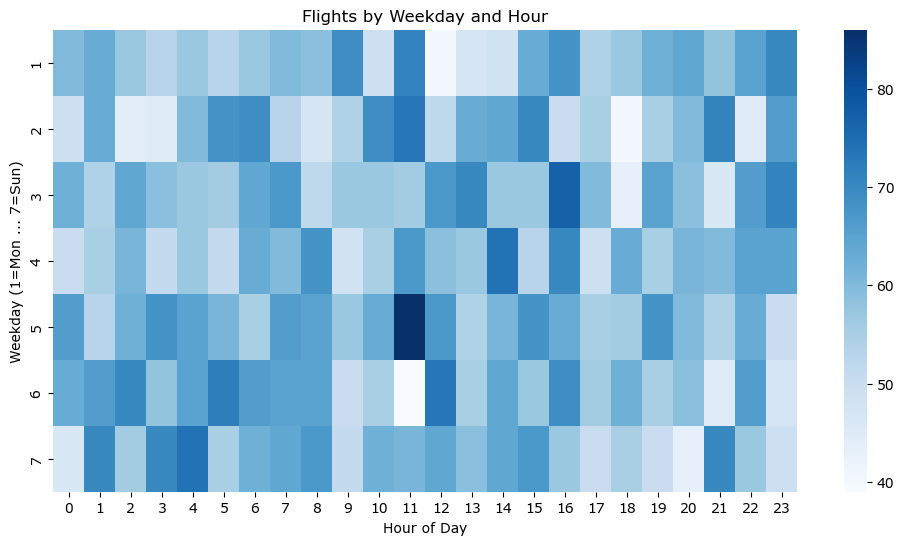

In [ ]:
flights_pivot = df.pivot_table(
    index='Weekday_numeric',
    columns='Hour',
    values='Flight_ID',
    aggfunc='count'
)

plt.figure(figsize=(12,6))
sns.heatmap(flights_pivot, cmap="Blues", annot=False)
plt.title("Flights by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday (1=Mon ... 7=Sun)")
plt.show()

/private/var/mobile/Containers/Data/Application/60A84F36-5992-4B25-921F-1FC3055C6C59/tmp/ipykernel_8936/3636676626.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


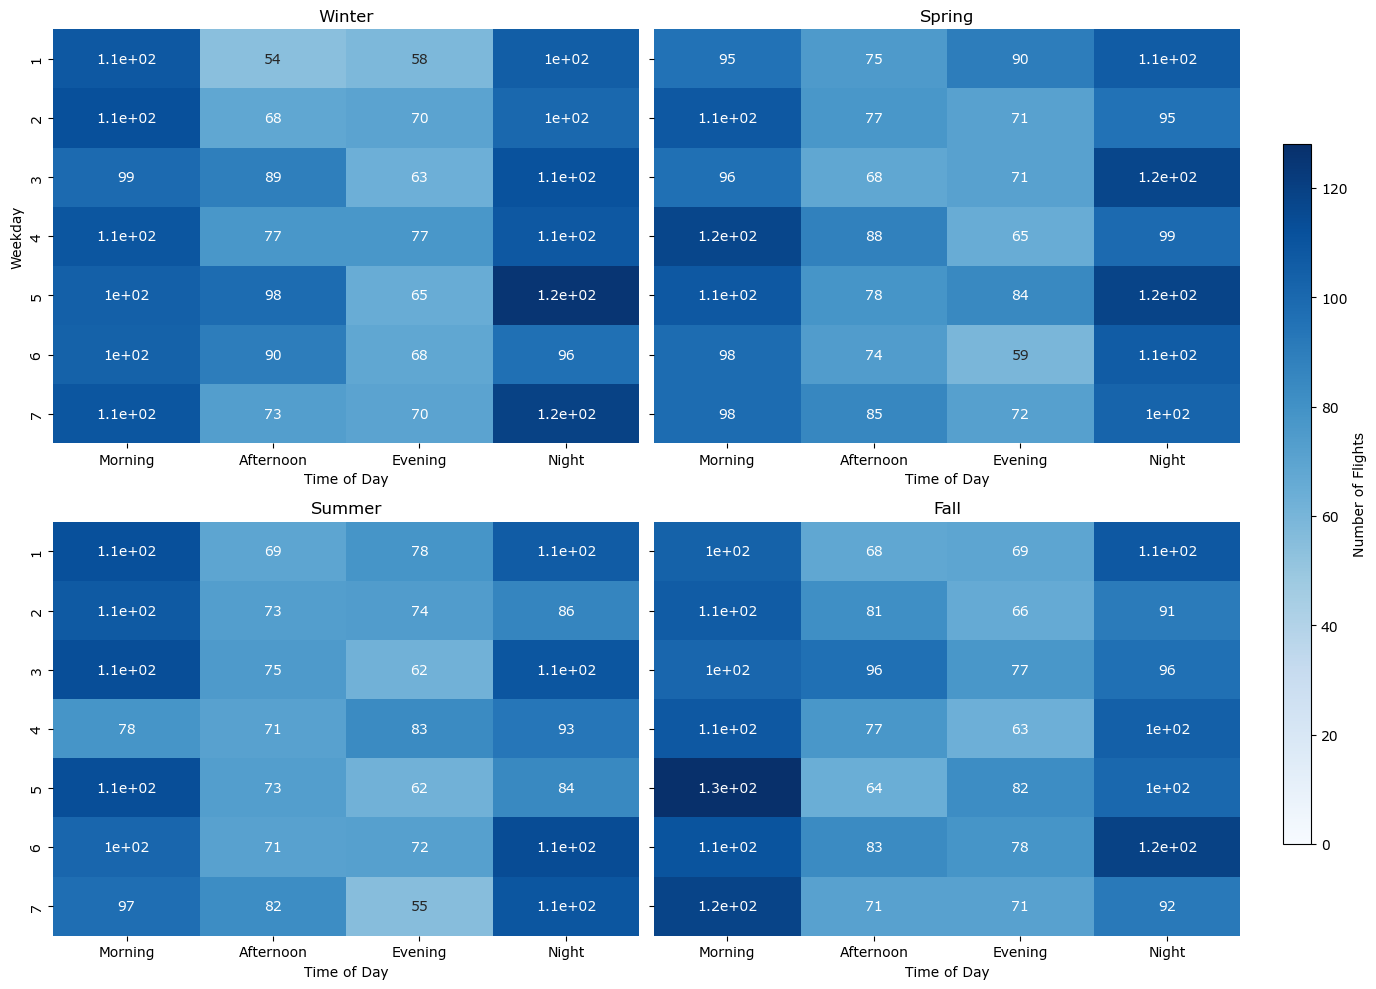

In [ ]:
time_order = ["Morning", "Afternoon", "Evening", "Night"]
season_labels = {0: "Winter", 1: "Spring", 2: "Summer", 3: "Fall"}  # mapping

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Max count for consistent color scale
max_count = 0
for season in seasons:
    pivot = df[df['Season']==season].pivot_table(
        index='Weekday_numeric',
        columns='TimeOfDay',
        values='Flight_ID',
        aggfunc='count',
        fill_value=0
    )
    max_count = max(max_count, pivot.values.max())

# Plot heatmaps with correct column order and season labels
for ax, season in zip(axes.flat, seasons):
    pivot = df[df['Season']==season].pivot_table(
        index='Weekday_numeric',
        columns='TimeOfDay',
        values='Flight_ID',
        aggfunc='count',
        fill_value=0
    )
    pivot = pivot[time_order]  # reorder columns
    sns.heatmap(pivot, cmap="Blues", ax=ax, vmin=0, vmax=max_count, cbar=False, annot=True)
    ax.set_title(f"{season_labels[season]}")  # use season label instead of number
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Weekday" if ax==axes[0,0] else "")

# Add shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=max_count))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Number of Flights')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

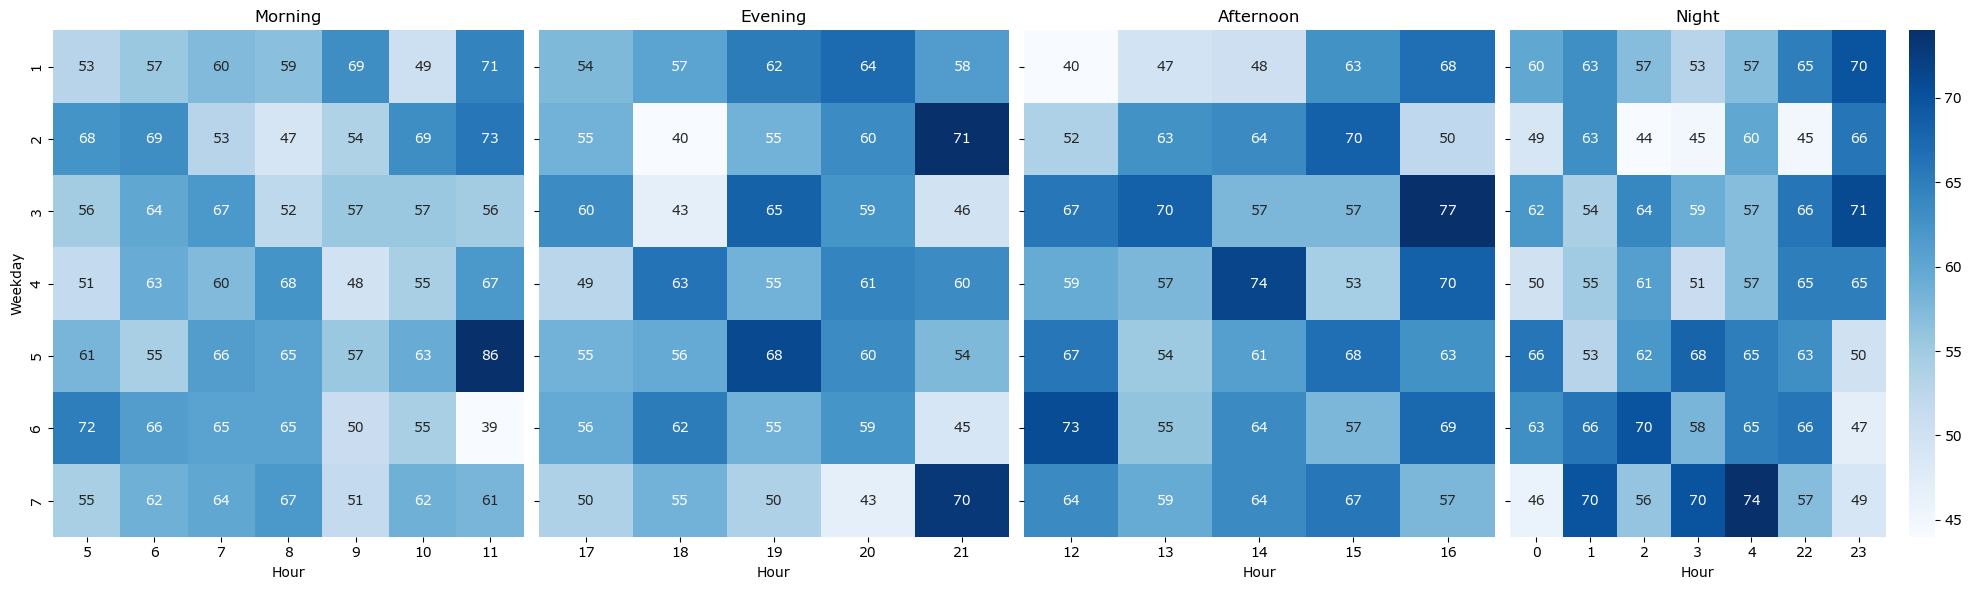

In [ ]:
times = df['TimeOfDay'].unique()
fig, axes = plt.subplots(1, len(times), figsize=(20,6), sharey=True)

for i, tod in enumerate(times):
    pivot = df[df['TimeOfDay']==tod].pivot_table(
        index='Weekday_numeric',
        columns='Hour',
        values='Flight_ID',
        aggfunc='count'
    )
    sns.heatmap(pivot, cmap="Blues", ax=axes[i], cbar=(i==len(times)-1), annot= True)
    axes[i].set_title(f"{tod}")
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Weekday" if i==0 else "")

plt.tight_layout()
plt.show()

In [ ]:
# Save DataFrame to CSV
df.to_csv('flights_data_for_dashboard.csv', index=False)
print("CSV file created successfully!")

CSV file created successfully!
